# <center> <span style="color:lightblue">**Machine Learning Algorithms**</span>

<img src="clafication.excalidraw.png">

|       Supervised       |        Un-Supervised         |
|------------------------|------------------------------|
| Linear regression      |  K-mean clustering           |
| Ridge & Lorso          |  DBScan                      |
| Logistic regression    |  Hirercal clustering         |
| Decission Tree         |  K nearest neighbor          |
| AdaBoust               |  PCA                         |
| Random Forest          |  LDA                         |
| Gradent Boostry        |                              |
| XgBoost                |                              |
| Naive Bayes            |                              |
| SVM                    |                              |
| KNN                    |                              |

## <center><span style="color:lightgreen">**$R^2$ and Adusted $R^2$**</span>

$R^2$

$$R^2=1-\frac{SS_{Rss}}{SS_{Total}}=1-\frac{\sum{(y_i-\hat{y_i})^2}}{\sum{(y_i-\bar{y})^2}}$$

$Adjusted \space R^2$

$$R^2_{adjusted}=1-\frac{(1-R^2)(N-1)}{N-P-1}$$

N->no: of datapoints

P->no: of features

### Cofusion Matrix

|  T   |  F   |
| :--: | :--: |
|  2   |  1   |
|  1   |  1   |

<center> Accuracy

$$\frac{TP+TN}{TP+FP+FN+TN}$$

<center> Precision

$$\frac{TP}{TP+FP}$$

<center> Recall

$$\frac{TP}{TP+FN}$$

<center> F-score

$$\frac{TP}{TP+FP}$$


In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [120]:
df=pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


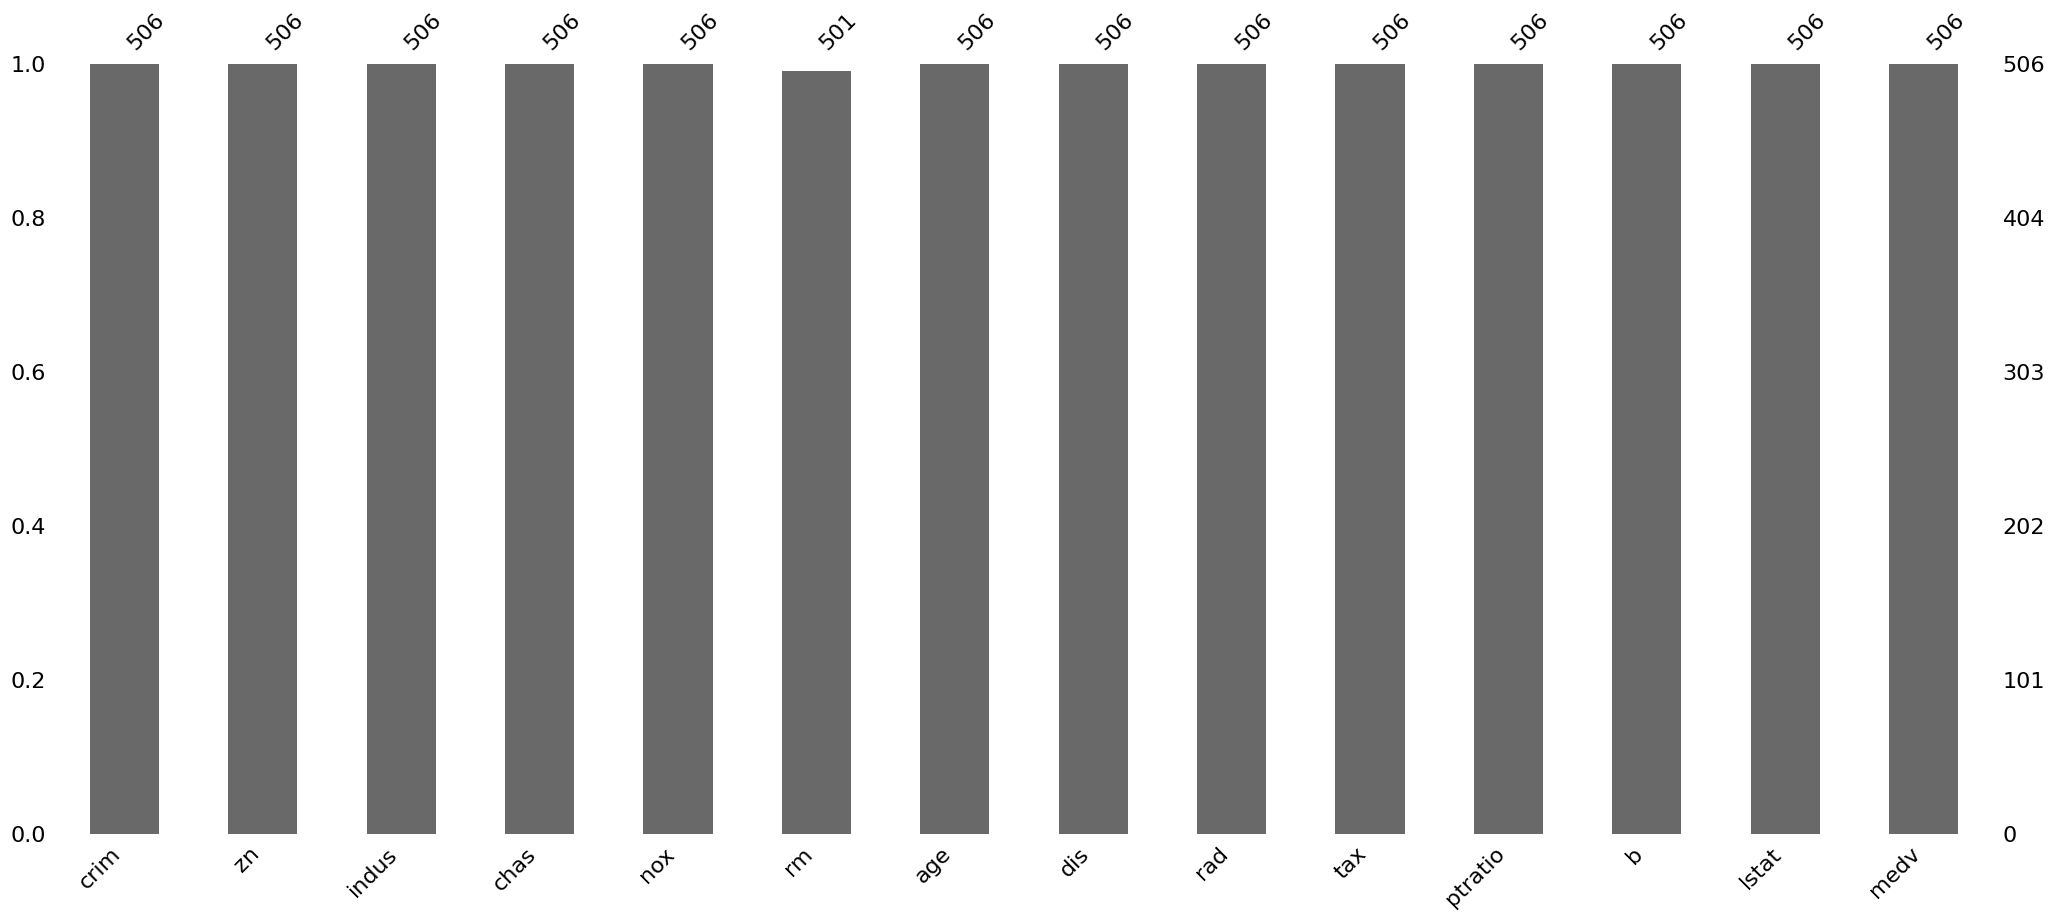

In [121]:
msno.bar(df)
#msno.matrix(df)
#msno.heatmap(df)
#msno.dendrogram(df)
plt.show()

In [122]:
df.dropna(inplace=True)

In [123]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [124]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [125]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

## Linear Regression

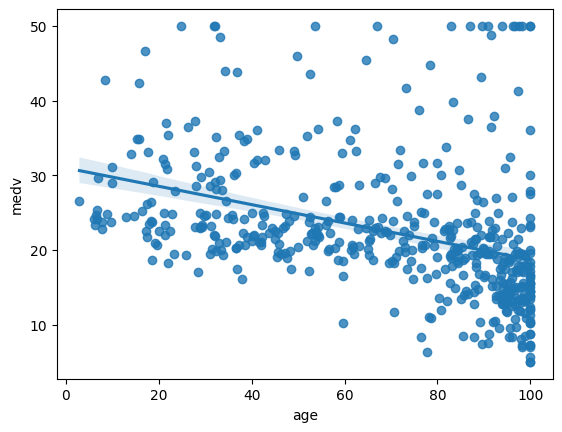

In [168]:
sns.regplot(x="age",y="medv",data=df)
plt.show()

In [127]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)


LinearRegression()

In [128]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(lin_reg,X,y=y,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)
mean_mse

-38.98784342151031

## Ridge Regression

In [129]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning


In [130]:
ridge=Ridge()
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

ridge_regressor=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)

In [131]:
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [132]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-33.89547569221603


Increse Params $\alpha$

In [133]:
params1={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor=GridSearchCV(ridge,params1,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-30.85131329711303


## Lasso Regression

In [134]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning

In [135]:
lasso=Lasso()

params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

lasso_regressor=GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)

In [136]:
lasso_regressor.fit(X,y)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.879e+03, tolerance: 3.914e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.250e+03, tolerance: 3.154e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.444e+03, tolerance: 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [137]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.689316780381915


Increse Params $\alpha$

In [138]:
params1={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

lasso_regressor=GridSearchCV(lasso,params1,scoring="neg_mean_squared_error",cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.879e+03, tolerance: 3.914e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.250e+03, tolerance: 3.154e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.444e+03, tolerance: 

{'alpha': 1}
-35.689316780381915


# Train and Test Split

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42) #test set is 33% and train set is 67%

# Linear Regression

In [140]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [141]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
mse=cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)
mean_mse

-28.05934713833828

## Ridge Ression

In [142]:
params1={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor=GridSearchCV(ridge,params1,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-28.059347138338307


## Lasso Regression

In [143]:
params1={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

lasso_regressor=GridSearchCV(lasso,params1,scoring="neg_mean_squared_error",cv=5)

lasso_regressor.fit(X_train,y_train)


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.985e+03, tolerance: 2.214e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.134e+03, tolerance: 2.392e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.327e+03, tolerance: 

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+03, tolerance: 3.068e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [144]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-28.059347138338307


## Check $R2$ score

In [145]:
from sklearn.metrics import r2_score



### Linear Regression R2 score

In [146]:
y_pred=lin_reg.predict(X_test)
r2_score1=r2_score(y_pred,y_test)
print(r2_score1)

0.7461415881952767


### Ridge Regression R2 score

In [147]:
y_pred=ridge_regressor.predict(X_test)
r2_score1=r2_score(y_pred,y_test)
print(r2_score1)

0.7461415881952749


### Lasso Regression R2 score

In [148]:
y_pred=lasso_regressor.predict(X_test)
r2_score1=r2_score(y_pred,y_test)
print(r2_score1)

0.7461415881952742


## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()

In [151]:
X=pd.DataFrame(dataset["data"],columns=dataset["feature_names"])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [152]:
y=pd.DataFrame(dataset["target"],columns=["Target"])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [153]:
y["Target"].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [154]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [155]:
params=[{"C":[1,5,10]},{"max_iter":[100,150]}]

In [156]:
model_1=LogisticRegression(C=100,max_iter=100)

In [157]:
model=GridSearchCV(model_1,param_grid=params,scoring="f1",cv=5)

In [158]:
model.fit(X_train,y_train)

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [159]:
print(model.best_params_)
print(model.best_score_)

{'max_iter': 150}
0.957830001865798


In [160]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [161]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [162]:
confusion_matrix(y_test, y_pred)

array([[ 64,   3],
       [  3, 118]], dtype=int64)

In [163]:
accuracy_score(y_test,y_pred)

0.9680851063829787

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

